In [ ]:
!nvidia-smi

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
import pickle

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="VLvIujsfF9FwxTLxf68C")
project = rf.workspace("project-caaax").project("project-x-xfwhv")
dataset = project.version(1).download("yolov8")

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=512 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 165MB/s]
New https://pypi.org/project/ultralytics/8.1.0 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Project-X-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffe

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1704981561.537ed41226a5.2221.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch21375.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch21376.jpg  weights
P_curve.png					    train_batch21377.jpg
PR_curve.png					    train_batch2.jpg


/content


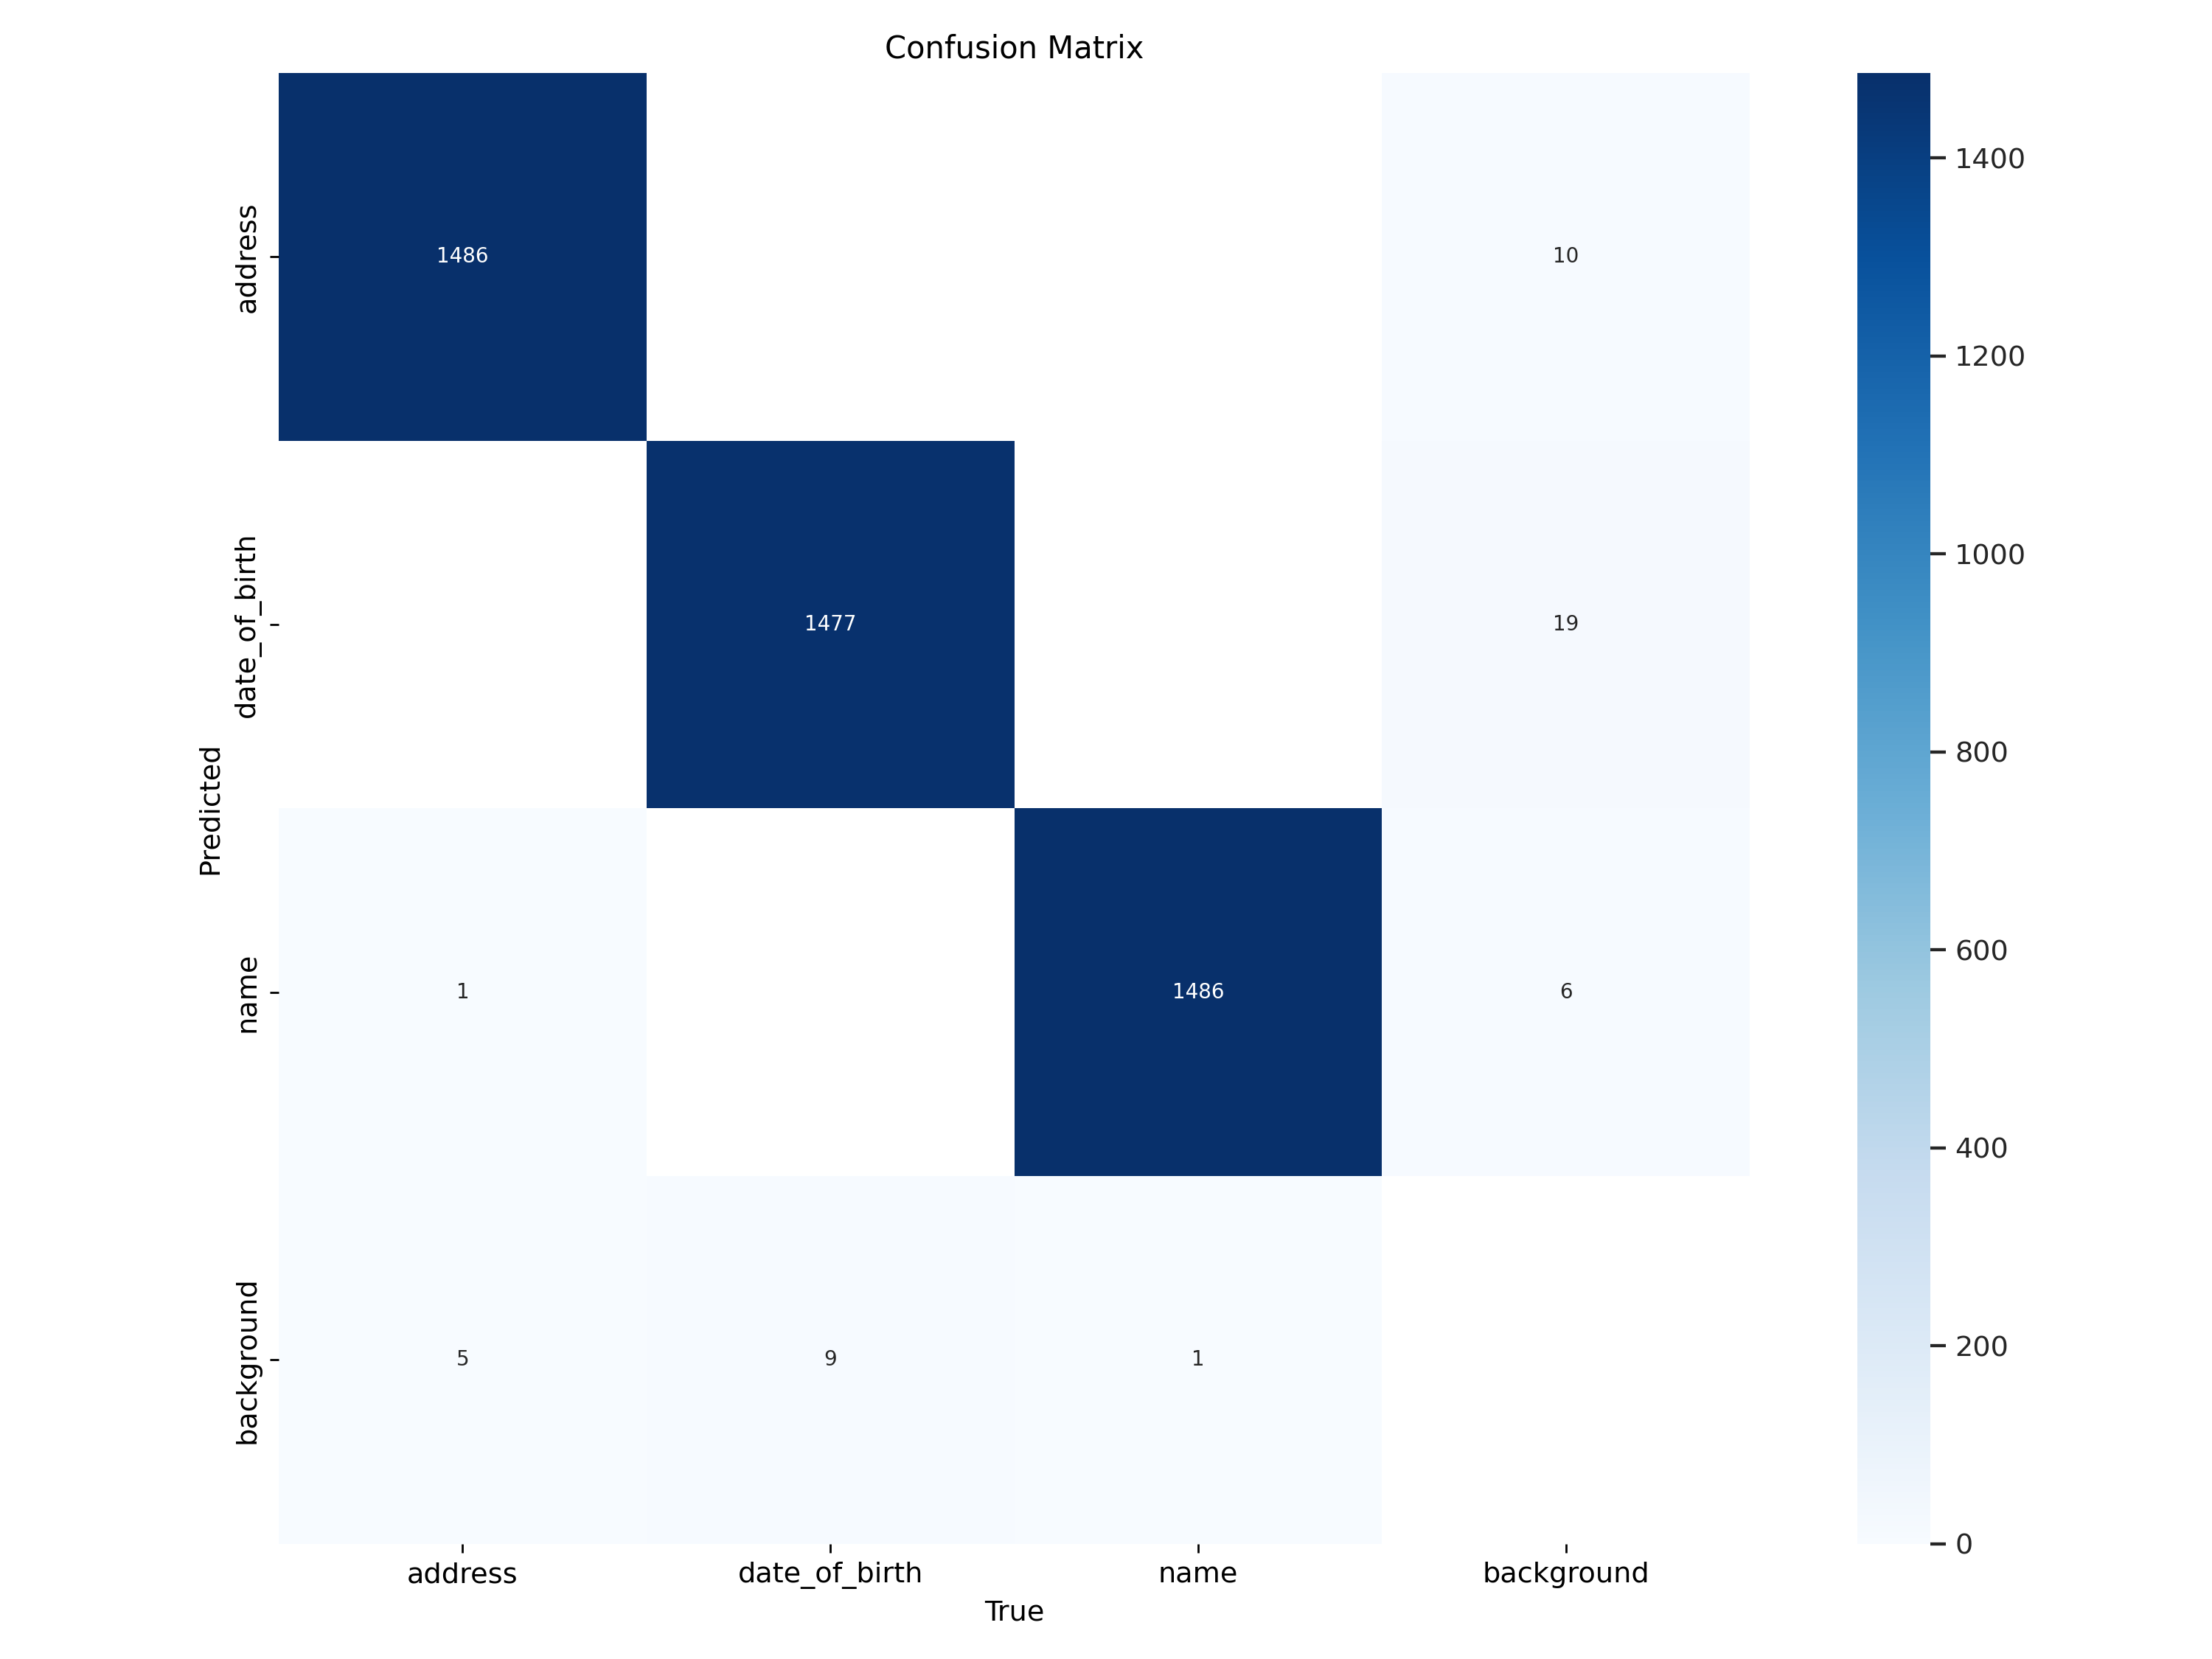

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


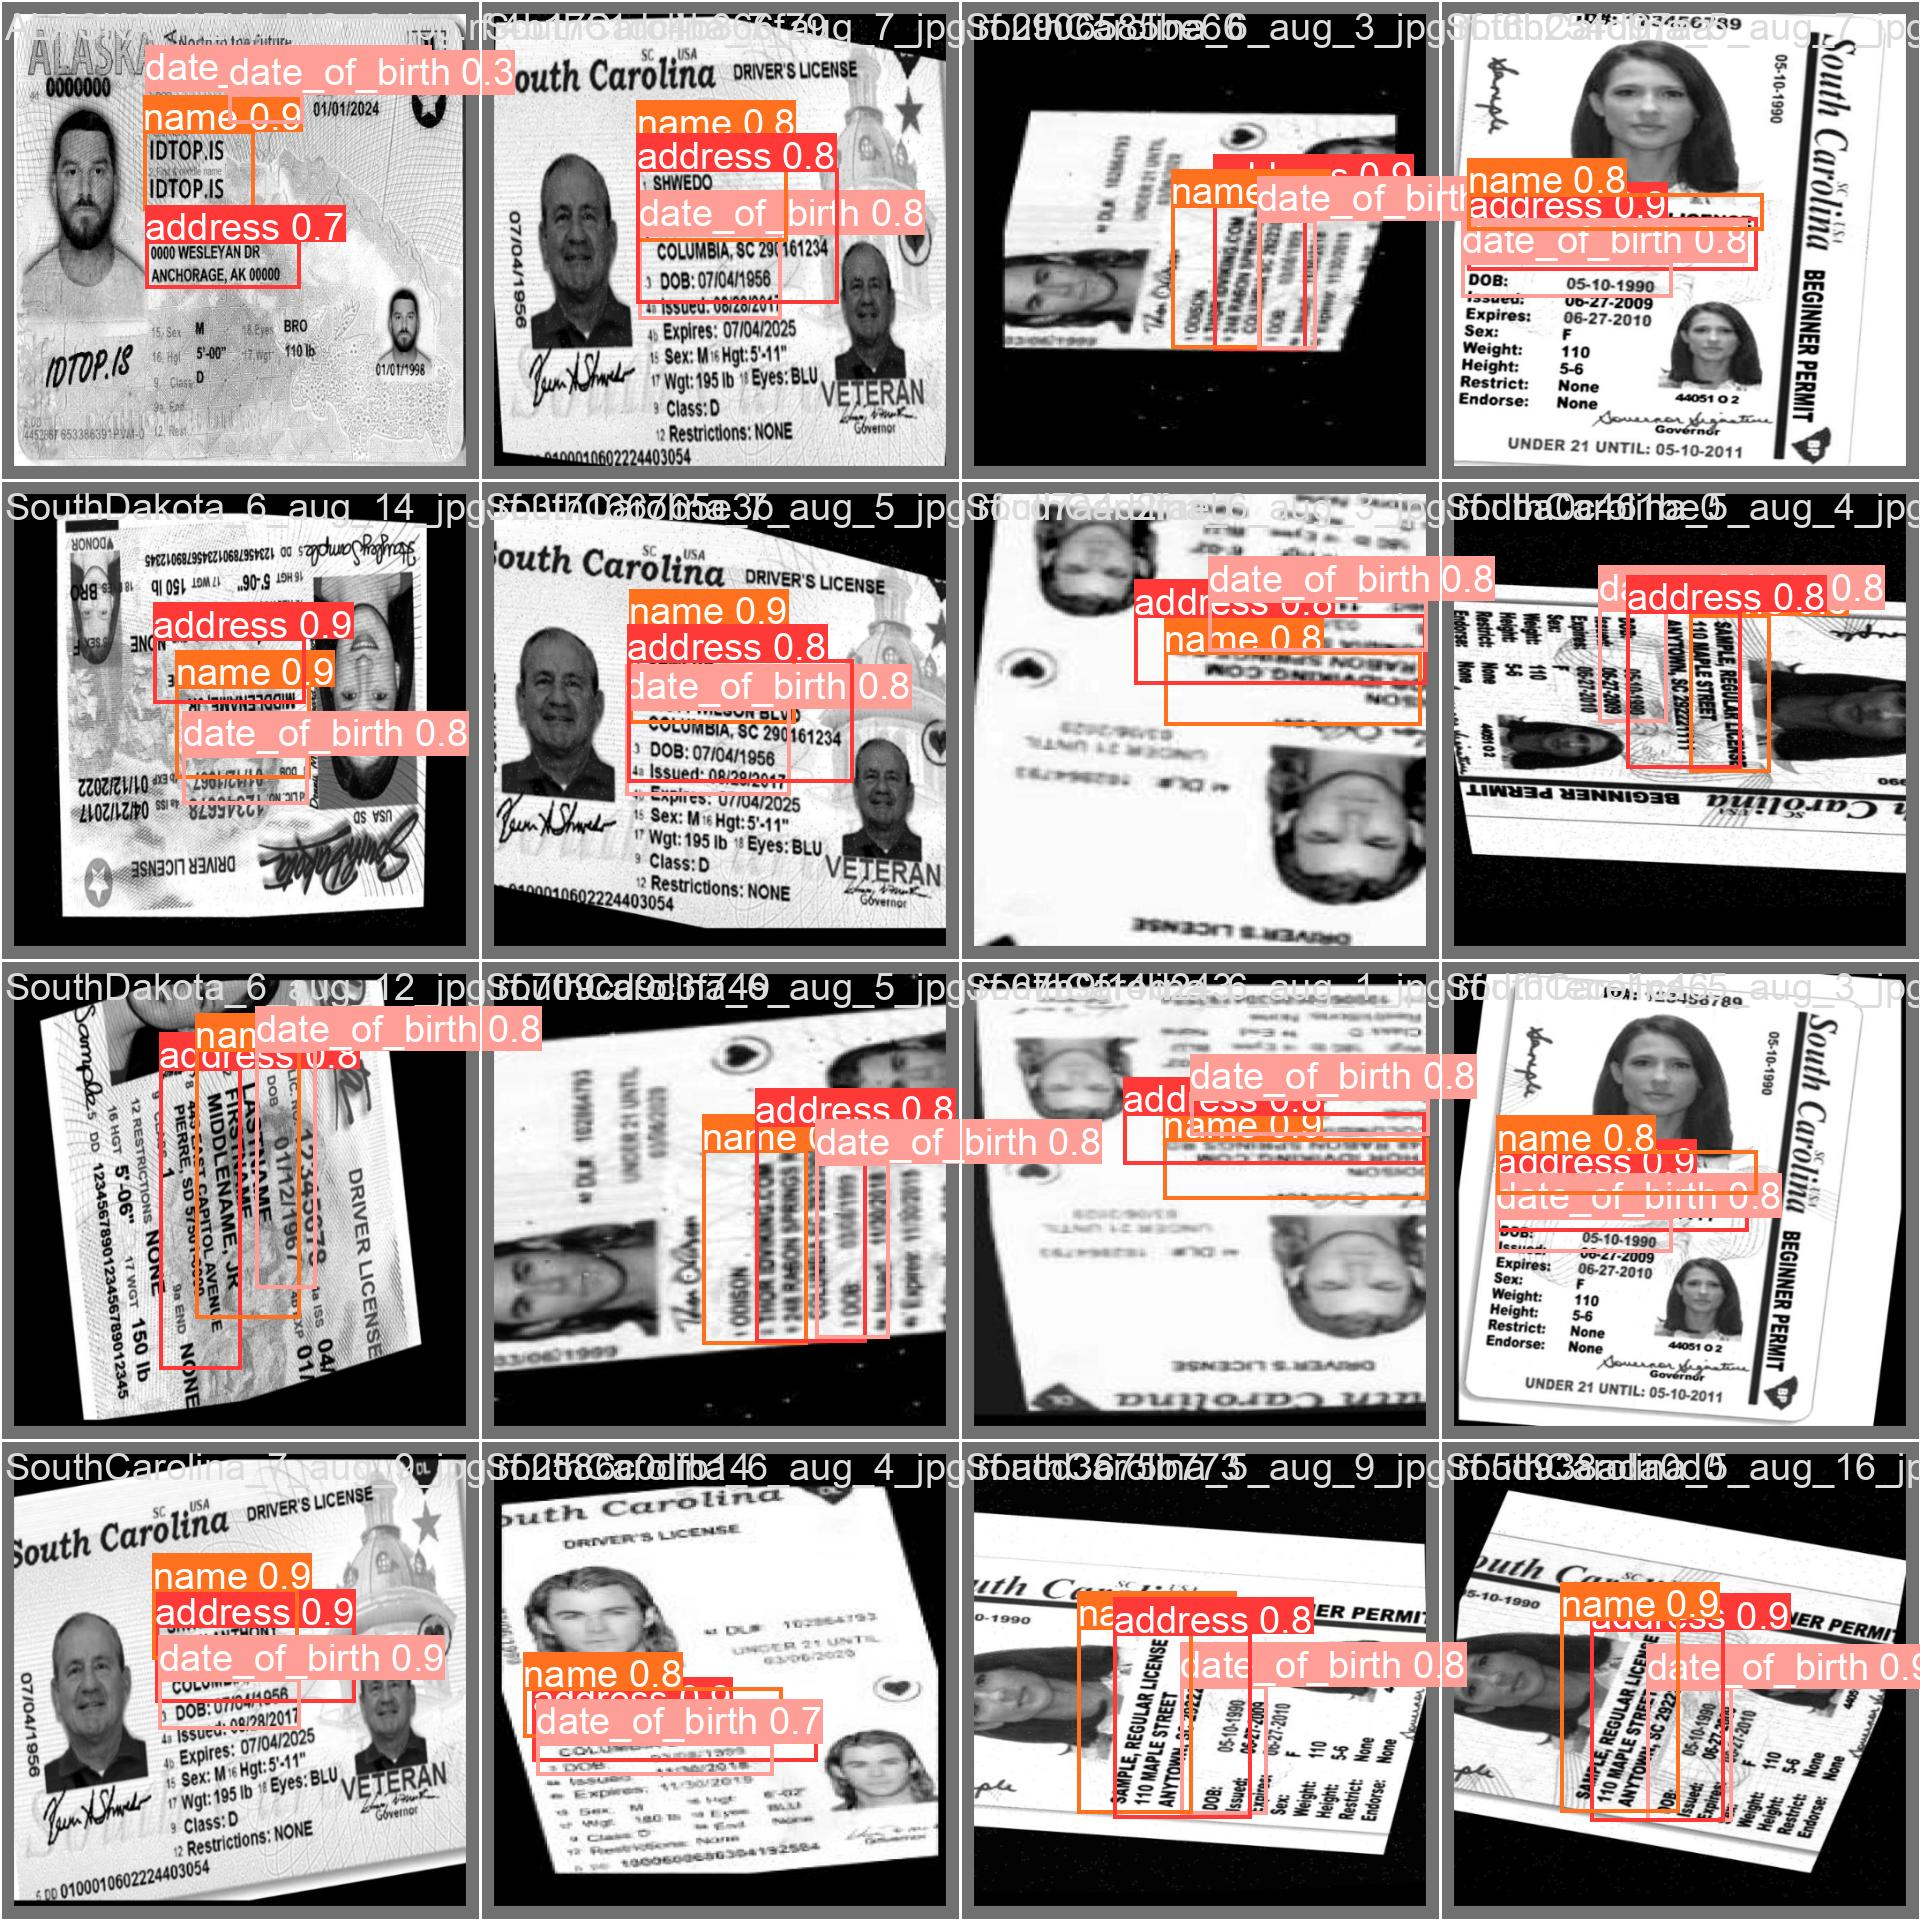

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Project-X-1/valid/labels.cache... 1508 images, 0 backgrounds, 0 corrupt: 100% 1508/1508 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 95/95 [00:24<00:00,  3.85it/s]
                   all       1508       4465      0.998      0.994      0.995      0.849
               address       1508       1492      0.999      0.996      0.995      0.857
         date_of_birth       1508       1486      0.996      0.988      0.995       0.83
                  name       1508       1487      0.998      0.997      0.995      0.861
Speed: 0.4ms preprocess, 6.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/858 /content/datasets/Project-X-1/test/images/ALABAMA_NEW_LIC_3_jpeg_jpg.rf.afd0b8444982b5c278eed3838dfc63b3.jpg: 512x512 1 address, 1 date_of_birth, 1 name, 11.1ms
image 2/858 /content/datasets/Project-X-1/test/images/ARIZONA_NEW_LIC_4_jpg.rf.c1e886efd97acdcd1a970705fa892c13.jpg: 512x512 1 address, 1 date_of_birth, 1 name, 11.2ms
image 3/858 /content/datasets/Project-X-1/test/images/ARIZONA_NEW_LIC_9_jpg.rf.de1a7b19d0509d93d66d34649a3ed3cd.jpg: 512x512 1 address, 1 date_of_birth, 1 name, 11.1ms
image 4/858 /content/datasets/Project-X-1/test/images/ARKANSAS_NEW_LIC_1_jpg.rf.ae4cf90ade560f8c7990b5a89bfa15ff.jpg: 512x512 1 address, 1 date_of_birth, 1 name, 11.1ms
image 5/858 /content/datasets/Project-X-1/test/images/Alabama-s_aug_1_jpg.rf.949851b002e1b43d715a6d32

**NOTE:** Let's take a look at few results.

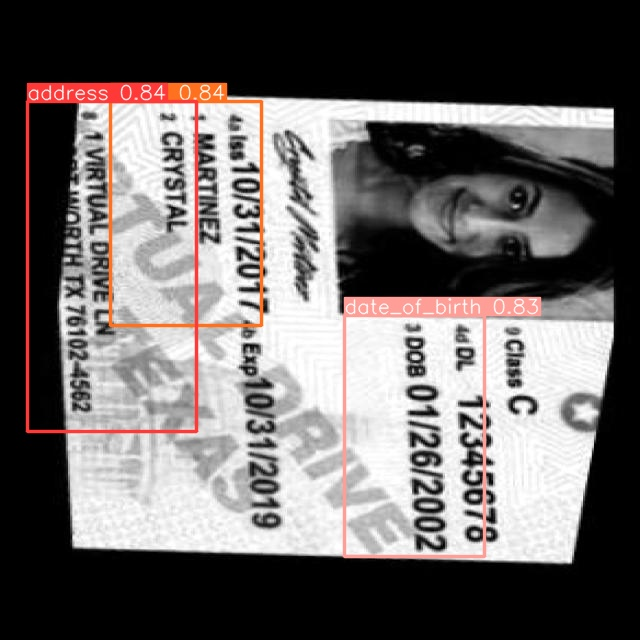

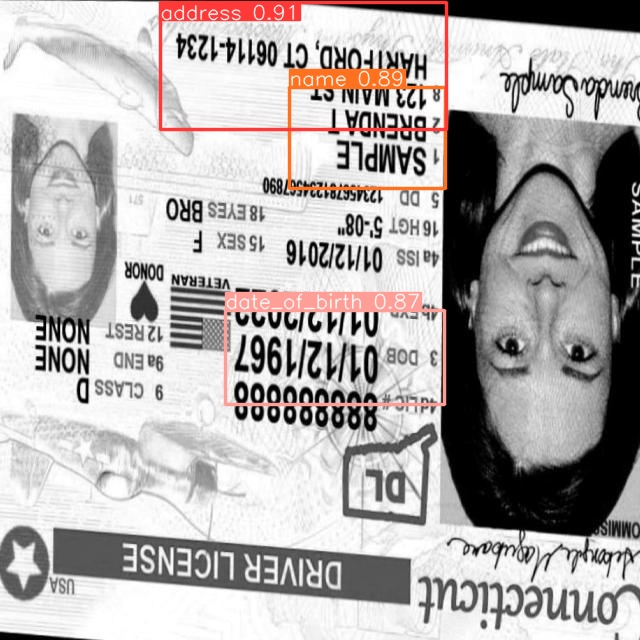

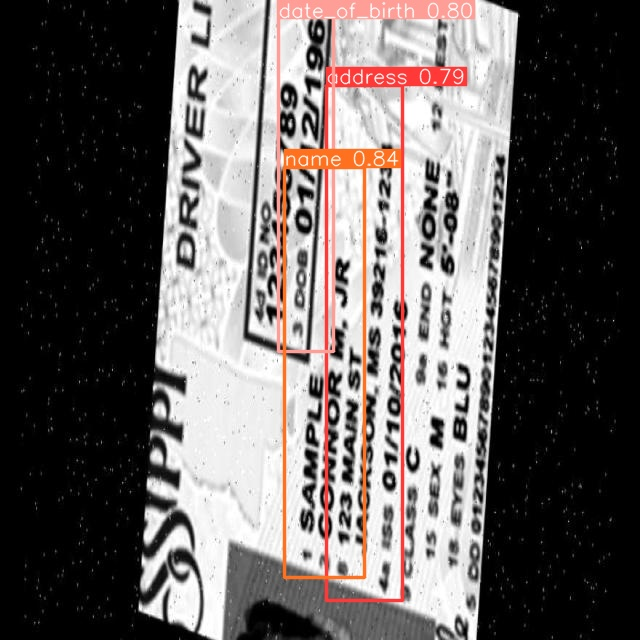

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/project-caaax/project-x-xfwhv/1
Share your model with the world at: https://universe.roboflow.com/project-caaax/project-x-xfwhv/model/1


## Save pickle file

In [ ]:
rf = Roboflow(api_key="VLvIujsfF9FwxTLxf68C")
project = rf.workspace("project-caaax").project("project-x-xfwhv")
model = project.version(1).model

pickle_file_path = "YOLO_All.pickle"

# Save the model as a pickle file
with open(pickle_file_path, 'wb') as f:
    pickle.dump(model, f)